In [1]:
pip install transformers==4.31.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from transformers import TFBertForSequenceClassification, BertTokenizer
import matplotlib.pyplot as plt  # 导入matplotlib库

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-01 19:40:07.530068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 19:40:08.442517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# 加载训练好的模型
model_path = "Users/Model18W"
model = TFBertForSequenceClassification.from_pretrained(model_path)

2023-08-01 19:40:10.244948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at Users/Model18W.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [5]:
# 加载分词器
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [6]:
# 加载新评论数据集
new_reviews_path = "New_amazon_reviews.tsv"
new_reviews_dataset = pd.read_csv(new_reviews_path, sep='\t', nrows=50000, skip_blank_lines=True)

In [7]:
# 分批进行推理（修改处）
batch_size = 100  # 每批处理的评论数量
predicted_ratings = []  # 存储所有预测的评分

for i in range(0, len(new_reviews_dataset), batch_size):
    batch_reviews = new_reviews_dataset["review_body"].iloc[i:i+batch_size].tolist()
    batch_reviews = [str(review) for review in batch_reviews]
    inputs = tokenizer(batch_reviews, padding=True, truncation=True, return_tensors="tf")
    predictions = model(inputs)
    predicted_labels = np.argmax(predictions.logits, axis=1)
    batch_ratings = predicted_labels + 1
    predicted_ratings.extend(batch_ratings)

In [8]:
# 将预测的评分添加到数据集中
new_reviews_dataset["predicted_rating"] = predicted_ratings

In [9]:
# 保存带有预测评分的新数据集
output_path = "predicted_reviews_dataset.tsv"
new_reviews_dataset.to_csv(output_path, sep='\t', index=False)

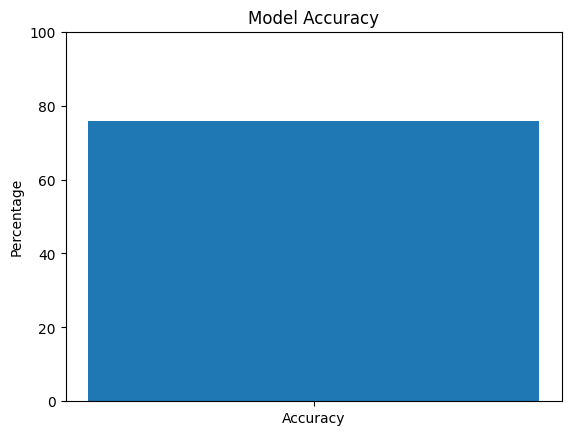

推理完成，预测的评分已保存到 predicted_reviews_dataset.tsv
Accuracy =  75.75800000000001


In [10]:
# 计算准确率并可视化
actual_ratings = new_reviews_dataset["star_rating"].values
accuracy = np.mean(predicted_ratings == actual_ratings) * 100
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 100)
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()

print("推理完成，预测的评分已保存到", output_path)
print("Accuracy = ", accuracy)

In [11]:
from datetime import datetime
from datetime import timedelta
from datetime import timezone

SHA_TZ = timezone(
    timedelta(hours=8),
    name='Asia/Shanghai',
)

# 协调世界时
utc_now = datetime.utcnow().replace(tzinfo=timezone.utc)
print(utc_now, utc_now.tzname())
print(utc_now.date(), utc_now.tzname())

# 北京时间
beijing_now = utc_now.astimezone(SHA_TZ)
print(beijing_now, beijing_now.tzname())
print(beijing_now.date(), beijing_now.tzname())

2023-08-02 00:53:59.900902+00:00 UTC
2023-08-02 UTC
2023-08-02 08:53:59.900902+08:00 Asia/Shanghai
2023-08-02 Asia/Shanghai
